## SIT742 Time series forecasting


Group: T2Group- 47

Group members
-----------------------------------
Student Name: Chaoyi (Barry) Chen

Workshop/Lab Session Time: 11am Monday

-----------------------------------

Student Name: Tran Duong Phuong Ly

Workshop/Lab Session Time: 9:00 am Thursday

-----------------------------------

Student Name: Anirudh Vedula

Workshop/Lab Session Time: 9:00 am Tuesday

### Part 1 Python Programming

#### Q1.1

Open the assignment2data.json file and convert it to csv format as dataframe in pandas. The meaning of the column is in assignment2data.pdf

• print the shape of the csv dataframe and find how many rows are duplicated (use pandas);

• remove the duplicated rows and then print the new shape of the dataframe (use pandas);

#### Answer 1.1

In [38]:
#install wget to load data
!pip install wget
#import wget to load data
import wget
#download assignment 2 data json file from provided link and assign to avariable
data_Jason = wget.download('https://raw.githubusercontent.com/tulip-lab/sit742/develop/Assessment/2022/data/assignment2data.json')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [39]:
#import pandas library 
import pandas as pd
#read assignment 2 data json file from provided jason file variable and assign to variable data_df
#set Lines = True to read the file as a json object per line
#reference - https://pandas.pydata.org/docs/reference/api/pandas.read_json.html
data_df = pd.read_json(data_Jason,lines=True)
print('Shape of data frame is',data_df.shape)

Shape of data frame is (46279, 43)


In [40]:
#print out first 5 rows from dataframe 
data_df.head()

,sacc_items,work_orders,female_items,is_newsletter_subscriber,male_items,afterpay_payments,msite_orders,wftw_items,mapp_items,orders,...,apple_payments,wspt_items,wacc_items,items,mspt_items,devices,different_addresses,wapp_items,other_device_orders,average_discount_onoffer
0,0,0,46,N,2,0,0,7,2,17,...,0,4,1,50,0,1,0,35,0,0.3364
1,0,0,24,Y,0,0,12,2,0,13,...,0,3,4,26,0,2,0,16,0,0.1404
2,0,0,147,Y,3,1,10,33,2,71,...,0,3,17,152,0,2,1,96,0,0.1851
3,0,0,0,Y,0,0,0,0,1,2,...,0,0,0,2,0,1,0,1,0,0.0000
4,0,0,1,Y,0,0,0,1,0,1,...,0,0,0,1,0,1,0,0,0,0.0000


In [41]:
#find out how many rows are duplicated 
#use .duplicated() to identify whether row is duplicated
#use groupby to filter out duplicated row by setting by parameter
#use .size() to return group sizes
data_df.groupby(by=data_df.duplicated().values).size()     

False    46030
True       249
dtype: int64

In [42]:
#print out result
print('Number of rows are duplicated is:',data_df.groupby(by=data_df.duplicated().values).size()[1])

Number of rows are duplicated is: 249


In [43]:
#remove duplicated rows 
data_df.drop_duplicates(subset=None, #select all columns by setting subset to 'none'
                       keep='first',#keep the first occurence value then drop the repeating values
                       inplace=True, #drop duplicated row without returning a copy
                       ignore_index=False) #do not label index

print('new shape of data frame after dropping duplicated rows is',data_df.shape)

new shape of data frame after dropping duplicated rows is (46030, 43)


##### Explanation 

Based on the task requirement, the most efficient way would be downloading the data first, then directed read the json file and return into pandas data frame file in CSV format, then print out the shape. The alternative would be just read the json file direct from the Github link without downloading it, and also could convert to CSV format file first before converting to pandas data frame file, however this will increase the notebook run time and adding unnecessary coding steps. Therefore, we believe the above solution is optimal since the file saved to the local drive without having to download the same file every time the file is needed, and not wasting computer storage to save the extra CSV format file.

#### Q1.2

Open the assignment2data.json file and convert it to csv format as dataframe in pandas. Removing the duplicated rows from dataframe and save as the new dataframe.

• define a function missingdf(df) with input argument df, which could print out all the column in dataframe df and also the missing value rate for each column. For example, with total 1000 rows, if column1 has missing value in 200 rows and its missing value rate will be 0.2 or 20%. The result of the function missingdf(df) will print the new dataframe which has two columns: the column_name and the percent_missing

#### Answer 1.2

In [44]:
#define a function to Open the assignment2data.json file and convert it to csv format as dataframe in pandas. 
#return data in csv format dataframe and new dataframe that have duplicated row removed
def readJason(fileJason):
    #read jason file then conver into datafram in CSV format
    data_df = pd.read_json(fileJason,lines=True)
    print('Shape of data frame is',data_df.shape)

    #Removing the duplicated rows from dataframe and save as the new dataframe. 
    data_dfNew=data_df.drop_duplicates(subset=None, #select all columns by setting subset to 'none'
                           keep='first',#keep the first occurence value then drop the repeating values
                           inplace=False, #drop duplicated row and returning a copy
                           ignore_index=False) #do not label index

    print('new shape of data frame after dropping duplicated rows is',data_dfNew.shape)
    return data_df,data_dfNew

#use function to Open the assignment2data.json file and convert it to csv format as dataframe in pandas. 
#and Removing the duplicated rows from dataframe and save as the new dataframe.
#return original dataframe with variable data_df and new dataframe with variable data_dfNew
data_df,data_dfNew=readJason(data_Jason)

Shape of data frame is (46279, 43)
new shape of data frame after dropping duplicated rows is (46030, 43)


In [45]:
#define a function missingdf(df) with input argument df, 
#which could print out all the column in dataframe df 
#and also the missing value rate for each column
def missingdf(df):
    #find the total missing value (null value) of each column using df.isnull.sum()
    #divide the found total missing value by the total No. of rows of dataframe (df.shape[0])
    #round up to 2 decimal places using round()
    nullValue=round(df.isnull().sum()/df.shape[0],2)
    #create new dataframe to include column name and percentage of missing value
    nullValue_df= pd.DataFrame(data={'The column_name':df.columns, #column names
                                 'The percent_missing':nullValue.values}) #total missing value precentage
    return nullValue_df #return new dataframe

#apply missingdf() function to dataframe to extract missing value precentage
print('Show column in dataframe df and also the missing value rate for each column')
missingdf(data_dfNew)

Show column in dataframe df and also the missing value rate for each column


,The column_name,The percent_missing
0,sacc_items,0.00
1,work_orders,0.00
2,female_items,0.00
3,is_newsletter_subscriber,0.00
4,male_items,0.00
5,afterpay_payments,0.00
6,msite_orders,0.00
7,wftw_items,0.00
8,mapp_items,0.00
9,orders,0.00


##### Explanation

Based on the task requirement, the most efficient way would be defined a function to read json file base on Q1.1 and return required data frame so the function can be reused on future tasks. For task of returning the new data frame that including the % missing value rate, find out the total number of missing values in each column first, then divide the number of rows of the data frame, would be a simple and efficient. The alternative way could be using ‘if’ statement to check if value of each column is null value, however this would increase notebook run time substantially and using computational power inefficiently. We believe our solution above is optimal due to the above reasons. 
 

#### Q1.3

Open the assignment2data.json file and convert it to csv format as dataframe in pandas. Removing the duplicated rows from dataframe and save as the new dataframe.

• define a function column_list(df) which could return a list which only contains the numerical column names and another list which only contains the categorical column names.

• Use describe() function from pandas to print out the statistics for all numerical columns.

#### Answer 1.3

In [46]:
#use function to Open the assignment2data.json file and convert it to csv format as dataframe in pandas. 
#and Removing the duplicated rows from dataframe and save as the new dataframe.
#return original dataframe with variable data_df and new dataframe with variable data_dfNew
data_df,data_dfNew=readJason(data_Jason)

Shape of data frame is (46279, 43)
new shape of data frame after dropping duplicated rows is (46030, 43)


In [47]:
#define a function column_list(df) which could return a list which only contains the numerical column names 
#and another list which only contains the categorical column names.
def column_list(df):
    #select the numerical columns and return their column names into a list format using .tolist()
    numCol=data_dfNew.select_dtypes(include='number').columns.tolist()
    #select the categorical columns name and return their column names into a list format using .tolist()
    cateCol=data_dfNew.select_dtypes(include='object').columns.tolist()
    return numCol,cateCol

#execute function on the dataframe
numCol,cateCol=column_list(data_dfNew)

print('a list which only contains the numerical column names')
print()
print(numCol)

a list which only contains the numerical column names

['sacc_items', 'work_orders', 'female_items', 'male_items', 'afterpay_payments', 'msite_orders', 'wftw_items', 'mapp_items', 'orders', 'cc_payments', 'curvy_items', 'paypal_payments', 'macc_items', 'cancels', 'revenue', 'returns', 'other_collection_orders', 'parcelpoint_orders', 'android_orders', 'days_since_last_order', 'vouchers', 'average_discount_used', 'shipping_addresses', 'redpen_discount_used', 'mftw_items', 'days_since_first_order', 'unisex_items', 'home_orders', 'coupon_discount_applied', 'desktop_orders', 'ios_orders', 'apple_payments', 'wspt_items', 'wacc_items', 'items', 'mspt_items', 'devices', 'different_addresses', 'wapp_items', 'other_device_orders', 'average_discount_onoffer']


In [48]:
print('a list which only contains the categorical column names')
print()
print(cateCol)

a list which only contains the categorical column names

['is_newsletter_subscriber', 'customer_id']


In [49]:
print('Use describe() function from pandas to print out the statistics for all numerical columns.')
data_dfNew[numCol].describe()

Use describe() function from pandas to print out the statistics for all numerical columns.


,sacc_items,work_orders,female_items,male_items,afterpay_payments,msite_orders,wftw_items,mapp_items,orders,cc_payments,...,apple_payments,wspt_items,wacc_items,items,mspt_items,devices,different_addresses,wapp_items,other_device_orders,average_discount_onoffer
count,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,...,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000
mean,0.087899,0.240995,6.472800,1.720660,0.053595,0.978557,1.633826,0.926613,4.111362,0.642972,...,0.000565,0.378753,0.573908,8.583750,0.116229,1.277580,0.116402,3.800782,0.000043,0.190171
std,0.539604,1.565071,17.830007,5.468827,0.225220,2.859161,4.088452,3.689578,8.122569,0.479128,...,0.023760,1.712662,2.542536,19.959377,0.716745,0.533286,0.320710,12.679782,0.009322,0.190702
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.150000
75%,0.000000,0.000000,5.000000,1.000000,0.000000,1.000000,2.000000,0.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,7.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.314300
max,29.000000,84.000000,537.000000,273.000000,1.000000,172.000000,261.000000,151.000000,665.000000,1.000000,...,1.000000,56.000000,353.000000,701.000000,38.000000,3.000000,1.000000,409.000000,2.000000,1.000000


##### Explanation

The reason we chose this solution because it’s simple and efficient, since we only using the ‘select_detypes’ method to isolate the categorical and numerical data, extract their column names then make them into a list. Finally, only print out statistics of columns that only if their column names are in the numerical data column name list. The alternative way could be using ‘for loop’ to run through the data frame column by column to isolate categorial and numerical data, however this would increase notebook run time substantially and using computational power inefficiently. We believe our solution above is optimal due to the above reasons.


Q1.4

Open the assignment2data.json file and convert it to csv format as dataframe in pandas. Removing the duplicated rows from dataframe and save as the new dataframe. The meaning of the column is in assignment2data.pdf

• look into the dataframe, there are two columns which are corrupted. 
Could you find it out and explain the reason? (you will need to draw some visualizations or check the statistics, also you may need to look into the data to understand the meaning the columns.)

• For the two corrupted columns, could you provide the solution to correct them?

#### Answer 1.4

In [50]:
#use function to Open the assignment2data.json file and convert it to csv format as dataframe in pandas. 
#and Removing the duplicated rows from dataframe and save as the new dataframe.
#return original dataframe with variable data_df and new dataframe with variable data_dfNew
data_df,data_dfNew=readJason(data_Jason)

Shape of data frame is (46279, 43)
new shape of data frame after dropping duplicated rows is (46030, 43)


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


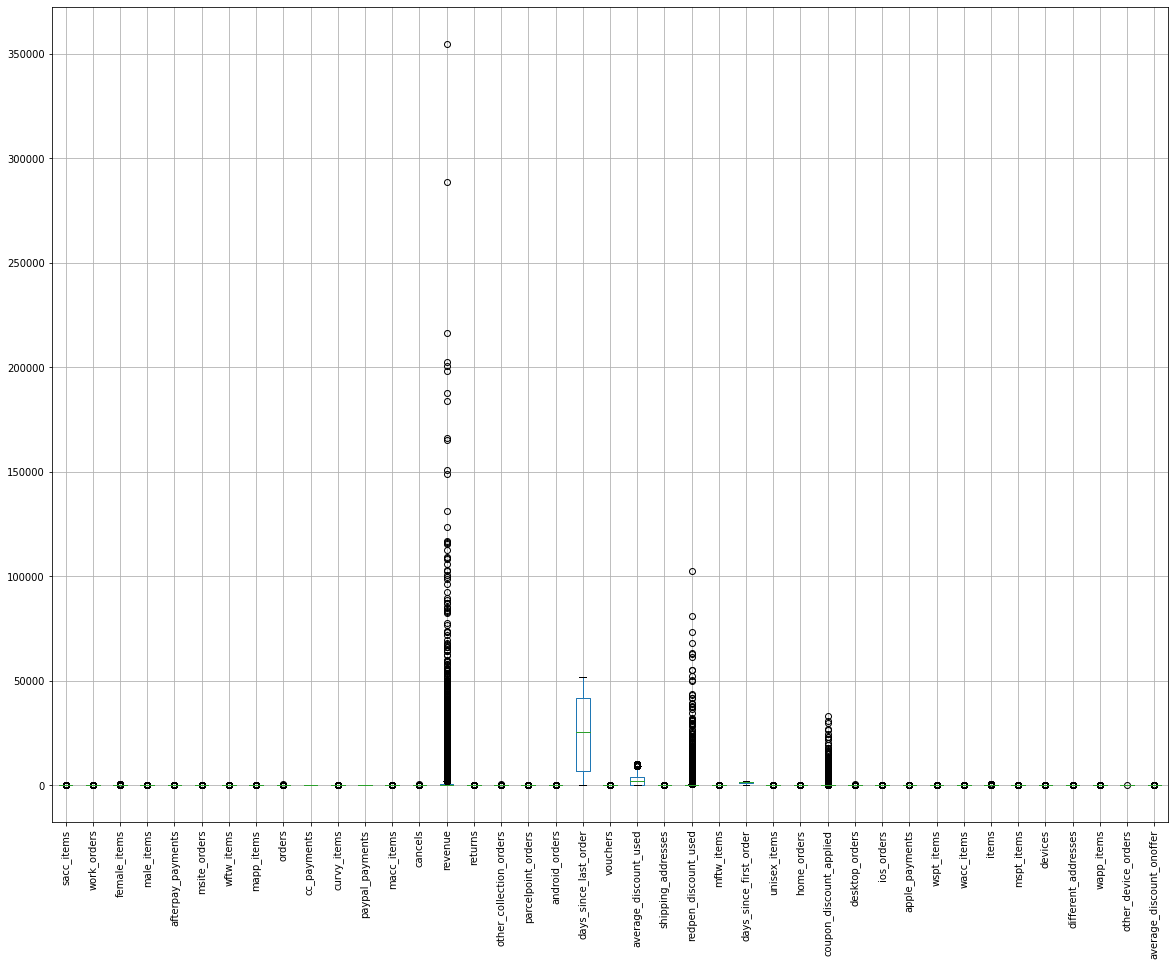

In [51]:
#plot boxplot for data visulization
#refernce -https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html
data_dfNew.boxplot(rot=90, #rotate label 90 degree
                   figsize=(20,15)) #set bigger plot size

In [52]:
#identify columns that have many outliers from boxplot above
outlier_cols=['revenue',
           'days_since_last_order',
           'average_discount_used',
           'redpen_discount_used',
          'coupon_discount_applied']
#use describe() to show the statics of these columns 
data_dfNew[outlier_cols].describe()

,revenue,days_since_last_order,average_discount_used,redpen_discount_used,coupon_discount_applied
count,46030.000000,46030.000000,46030.000000,46030.000000,35826.000000
mean,1305.479232,24535.400217,2357.118087,435.567699,175.173407
std,5611.107402,16934.525487,2032.366465,1851.597072,841.277098
min,0.000000,24.000000,0.000000,0.000000,0.000000
25%,76.360000,6768.000000,80.974900,0.000000,0.000000
50%,213.015000,25416.000000,2122.822500,54.480000,0.000000
75%,791.870000,41640.000000,3829.608450,253.677500,62.640000
max,354700.160000,51840.000000,10000.000000,102653.770000,33332.260000


##### Corrupted Column 1 - column 'days_since_last_order'

In [53]:
print('Column days_since_last_order seems to have unreasonable mean value of {} years and max value of {} years'
      .format(round(data_dfNew['days_since_last_order'].mean()/365,0),round(data_dfNew['days_since_last_order'].max()/365),0))
print()

print('Therefor consider as corrupted column')    

Column days_since_last_order seems to have unreasonable mean value of 67.0 years and max value of 142 years

Therefor consider as corrupted column


In [54]:
#solution to correct corrupted column 'days_since_last_order'
print('use min-max normalization for column days_since_last_order')
data_dfNew_fixed=data_dfNew.copy() #make a copy of dataframe for proposed solution
# apply normalization techniques
data_dfNew_fixed['days_since_last_order'] = (data_dfNew_fixed['days_since_last_order'] - data_dfNew_fixed['days_since_last_order'].min()) / (data_dfNew_fixed['days_since_last_order'].max() - data_dfNew_fixed['days_since_last_order'].min())
#show normalization result 
data_dfNew_fixed['days_since_last_order'].describe()

use min-max normalization for column days_since_last_order


count    46030.000000
mean         0.473047
std          0.326820
min          0.000000
25%          0.130153
50%          0.490042
75%          0.803150
max          1.000000
Name: days_since_last_order, dtype: float64

In [55]:
#solution to correct corrupted column 'days_since_last_order'
print('Solution: use min-max normalization for column days_since_last_order')
data_dfNew_fixed=data_dfNew.copy() #make a copy of dataframe for proposed solution

#create normalization method
def min_max(dataframe,colName):
    dataframe[colName] = (dataframe[colName] - dataframe[colName].min()) / (dataframe[colName].max() - dataframe[colName].min())
    return dataframe[colName] 
# apply normalization techniques
data_dfNew_fixed['days_since_last_order'] = min_max(data_dfNew_fixed,'days_since_last_order')
print()
print('column statics after normalization')
data_dfNew_fixed['days_since_last_order'].describe()

Solution: use min-max normalization for column days_since_last_order

column statics after normalization


count    46030.000000
mean         0.473047
std          0.326820
min          0.000000
25%          0.130153
50%          0.490042
75%          0.803150
max          1.000000
Name: days_since_last_order, dtype: float64

##### Corrupted Column 2 - column 'different_addresses' 

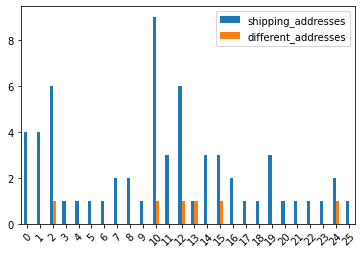

In [56]:
#plot bar plot for data visulization
#refernce -https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html

#select address columns number for further examination 
address_index=['shipping_addresses','different_addresses']

no_rows=25 #select the top 25 rows for checking 

#extract the selected rows of each column from dataframe
shipAdd_ten=data_dfNew.loc[:no_rows, address_index[0]]
diffAdd_ten=data_dfNew.loc[:no_rows, address_index[1]]

#create new data frame using the extracted columns 
address_df=pd.DataFrame({address_index[0]:shipAdd_ten,
                        address_index[1]:diffAdd_ten})

#bar plot with x-axis label rotate 45 degree
address_df.plot.bar(rot=45)

Since the 'different_addresses' column representing number of times a different billing and shipping address was used, and the 'shipping_addresses' column representing number of different shipping addresses used. From the bar plot of the top 25 rows of data above, we can see many customers have 2 to 3 different shipping addresses used (blue bar), but the only 5 out of 25 customers has only have once different billing and shipping addressed used, therefore I suspect the 'different_addresses' column could be a corrupted column. 

In [57]:
print('Solution: dropping column - different_addresses')
data_dfNew_fixed=data_dfNew_fixed.drop('different_addresses',axis=1)
print()
print('Print top 5 row data after dropping corrupted column')
data_dfNew_fixed.head()

Solution: dropping column - different_addresses

Print top 5 row data after dropping corrupted column


,sacc_items,work_orders,female_items,is_newsletter_subscriber,male_items,afterpay_payments,msite_orders,wftw_items,mapp_items,orders,...,ios_orders,apple_payments,wspt_items,wacc_items,items,mspt_items,devices,wapp_items,other_device_orders,average_discount_onoffer
0,0,0,46,N,2,0,0,7,2,17,...,0,0,4,1,50,0,1,35,0,0.3364
1,0,0,24,Y,0,0,12,2,0,13,...,0,0,3,4,26,0,2,16,0,0.1404
2,0,0,147,Y,3,1,10,33,2,71,...,0,0,3,17,152,0,2,96,0,0.1851
3,0,0,0,Y,0,0,0,0,1,2,...,0,0,0,0,2,0,1,1,0,0.0000
4,0,0,1,Y,0,0,0,1,0,1,...,0,0,0,0,1,0,1,0,0,0.0000


##### Explanation

The reason of this using the solution was that it simply using pandas built-in plotting package to plot both boxplot and bar plot for data analysis to find out the corrupted columns. The min-max normalization method also able to keep the data distribution of the corrupted column with further manipulation, and by simply dropping the 2nd corrupted column could prevent conflict information affecting the data integrity. The alternative way could be using Matplotlib python library to plot the boxplot and bar plot, or using different plotting technique such as pie chart. However, we considered our solution is optimal since it provided sufficient information for us to make decision without using extra python package. 

Q1.5 

Open the assignment2data.json file and convert it to csv format as dataframe in pandas. Removing the duplicated rows from dataframe and save as the new dataframe. The meaning of the column is in assignment2data.pdf

• Write code and return the results by using pandas package to find out ”What percentage of customers who have purchased female items have paid by credit card?”

• Write code and return the results by using pandas package to find out ”What was the total revenue to the nearest dollar for customers who have paid by credit card?”

#### Answer 1.5

In [58]:
#use function to Open the assignment2data.json file and convert it to csv format as dataframe in pandas. 
#and Removing the duplicated rows from dataframe and save as the new dataframe.
#return original dataframe with variable data_df and new dataframe with variable data_dfNew
data_df,data_dfNew=readJason(data_Jason)

Shape of data frame is (46279, 43)
new shape of data frame after dropping duplicated rows is (46030, 43)


In [59]:
#check unique value of each column
#0 represent no credit card payment and 1 represent credit card payment
print(data_dfNew['cc_payments'].unique()) 
#check unique value of 'female_items' columns 
print(data_dfNew['female_items'].unique())

[1 0]
[ 46  24 147   0   1  11 114   6  49  14  20   7  81  21  10 121   4  13
  12   3   2   9   5  33  40  23  18 104  16  17  96  15 501 130  19  28
  52  45  22  25  73  26   8  44  34  50 116 185  65 165  37  29  61  51
  39 103  31  36  60  64  87  27 107 223  48  57  67 200  76 168  90  41
  54  32  92  86  35 127  56  30  58 157  42  77 294 106 155 118  43  47
  62  78  69 117 170 101  72  53 113 115  94  88  66  97  68 120 199 235
 211  38  74  93 144 245 161 238 366 146 228  82 125 141 124  91 160  89
 202  99 138 188  70  98  75  59  95 134  79  80 180 136 153 203 216 181
 244  71 316  55  63 132  85 152 100 108 162 131 123 111 129 224 128 163
 139 201 266 122 506 119 257 537  83  84 109 186 269 166 137 173 260 213
 148 150 194 126 416 102 219 154 110 105 197 175 171 233 145 133 318 112
 309 356 214 222 208 291 264 196 485 371 151 192 193 227 230 249 209 364
 509 308 229 190 177 142 182 143 191 251 195 392 394]


In [60]:
#check if the total number of customer equal to numbers of row in the dataframe
len(data_dfNew['customer_id'].unique())==data_dfNew.shape[0]

True

In [61]:
#extract No. of row that have cc_payment value of 1 and have female_item value larger than 0
#divide the extracted number with total number of rows of dataframe(or totla No. of customer)
#assign returned value to a variable cust_cc_femaleItem
cust_cc_femaleItem=data_dfNew.loc[(data_dfNew['cc_payments']==1) & (data_dfNew['female_items']>0)].shape[0] / data_dfNew.shape[0]
#print out result 
print('{0:.2%} of customers who have purchased female items have paid by credit card'.format(cust_cc_femaleItem))

48.84% of customers who have purchased female items have paid by credit card


In [62]:
#select the value in revenue column that has cc_payment value of 1 
#sum up all value of selected column then round up to the nearest dollar value
#convert the rounded up float value to integer then assign to variable cust_cc_rev
cust_cc_rev=int(round(data_dfNew.loc[data_dfNew['cc_payments']==1]['revenue'].sum(),0))
#print out result 
print('$ {} was the total revenue to the nearest dollar for customers who have paid by credit card'.format(cust_cc_rev))

$ 50189329 was the total revenue to the nearest dollar for customers who have paid by credit card


##### Explanation

After inputting the file, we investigate the unique value of credit card payments and female items to have general information about the data. Then by using the function ‘len()’ to check if the total number of customers is equal to total numbers of rows in the data. Next, we extract the number of rows with ‘female_items’ value larger than 0 and the row with ‘cc_payments’ value of 1, representing the payment method of using credit card. Then dividing it by the total number of customers to calculate the percentage of customers who have purchased female items and then paid by credit card. The alternative way could be finding customers who purchased ‘femal_items’ first, find who paid via credit card from these customers. We believe our solution the more efficient way to get the value of certain groups in total comparing to the alternative method.

Q1.6 

Open the assignment2data.json file and convert it to csv format as dataframe in pandas. Removing the duplicated rows from dataframe and save as the new dataframe. The meaning of the column is in assignment2data.pdf

• Write a code to change the value of ’Y’ from column is_newsletter_subscriber to 1 and ’N’
to 0. (1 and 0 is ”int” type)

• Print out the value count for column is_newsletter_subscriber.
   

#### Answer 1.6

In [63]:
#use function to Open the assignment2data.json file and convert it to csv format as dataframe in pandas. 
#and Removing the duplicated rows from dataframe and save as the new dataframe.
#return original dataframe with variable data_df and new dataframe with variable data_dfNew
data_df,data_dfNew=readJason(data_Jason)

Shape of data frame is (46279, 43)
new shape of data frame after dropping duplicated rows is (46030, 43)


In [64]:
#change the value of ’Y’ from column is_newsletter_subscriber to 1 and ’N’ to 0. (1 and 0 is ”int” type)
#make a copy of the dataframe
data_dfNew_news=data_dfNew.copy()
#use replace to replace string 'Y' and 'N' with integer 1 and 0
#use inplace to not return a copy
data_dfNew_news['is_newsletter_subscriber'].replace(('Y','N'),(1,0),inplace=True)
print('Column after replacing string with integer')
print(data_dfNew_news['is_newsletter_subscriber'])#print out result

Column after replacing string with integer
0        0
1        1
2        1
3        1
4        1
        ..
46274    0
46275    1
46276    0
46277    1
46278    1
Name: is_newsletter_subscriber, Length: 46030, dtype: int64


In [65]:
#value count
print('Print out the value count for column is_newsletter_subscriber.')
#use value_counts method
data_dfNew_news['is_newsletter_subscriber'].value_counts()

Print out the value count for column is_newsletter_subscriber.


0    27203
1    18827
Name: is_newsletter_subscriber, dtype: int64

##### Explanation

Based on the task requirement, after open.json file and convert it to CSV format, a new copy of data will be created. From this new copy of data, we convert the value Y to 1 and N to 0 from column "is_newsletter_subscriber" by using ‘.replace()’ method and print them out. This task could be done using the ‘re.sub()’ function to find the pattern then replace with new value, but it is slightly more complex. Thus, we believe that using ‘.replace()’ to replace a string with integer value for the task is considered to be more simplicity and efficient way.

Q1.7

Open the assignment2data.json file and convert it to csv format as dataframe in pandas. Removing the duplicated rows from dataframe and save as the new dataframe. The meaning of the column is in assignment2data.pdf

Create some new features for the dataframe by using below code:

df[’female_item_rate’] = df[’female_items’]/df[’items’] 

df[’male_item_rate’] = df[’male_items’]/df[’items’] 

df[’unisex_items_rate’] = df[’unisex_items’]/df[’items’]

• Write a code find out how many rows (customers) could have the value female_item_rate == 1 and the value male_item_rate == 1 and the value orders > 4.11

#### Answer 1.7

In [66]:
#use function to Open the assignment2data.json file and convert it to csv format as dataframe in pandas. 
#and Removing the duplicated rows from dataframe and save as the new dataframe.
#return original dataframe with variable data_df and new dataframe with variable data_dfNew
data_df,data_dfNew=readJason(data_Jason)

Shape of data frame is (46279, 43)
new shape of data frame after dropping duplicated rows is (46030, 43)


In [67]:
df=data_dfNew.copy()#make a copy of the dataframe

#Create some new features for the dataframe by using below code:

df['female_item_rate'] = df['female_items']/df['items']

df['male_item_rate'] = df['male_items']/df['items']

df['unisex_items_rate'] = df['unisex_items']/df['items']

#display first 5 rows of the new features for the dataframe
df[['female_item_rate','male_item_rate','unisex_items_rate']].head()

,female_item_rate,male_item_rate,unisex_items_rate
0,0.920000,0.040000,0.040000
1,0.923077,0.000000,0.076923
2,0.967105,0.019737,0.013158
3,0.000000,0.000000,1.000000
4,1.000000,0.000000,0.000000


In [68]:
#find out how many rows (customers) could have the value female_item_rate == 1 
#and the value male_item_rate == 1 and the value orders > 4.11
#count the numbers of row using shape[0] then assign to variable no_row_custMeetCondition
no_row_custMeetCondition=df[(df['female_item_rate']==1) & (df['male_item_rate']==1) & (df['orders']>4.11)].shape[0]
#print out result
print('{} rows (customers) could have the value female_item_rate == 1 and the value male_item_rate == 1 and the value orders > 4.11'.format(no_row_custMeetCondition))

0 rows (customers) could have the value female_item_rate == 1 and the value male_item_rate == 1 and the value orders > 4.11


##### Explanation

We simply applied condition search in our solution to find the number of customers who purchased both male and female item and having order value over 4.11. As an alternative, we could import polars from the Python ‘polars’ package to create data frame samples. The workflow analysis and interface are familiar. However, we believe our solution is optimal because by simply using ‘pandas’ condition search method, it is easier to be understood and implemented without import extra python library.

Q1.8

Open the assignment2data.json file and convert it to csv format as dataframe in pandas. Removing the duplicated rows from dataframe and save as the new dataframe. The meaning of the column is in assignment2data.pdf

In this question, you will use the original format of the data to group data on the value of column is_newsletter_subscriber to show the average order value, the max order value, the median order value.

##### Answer 1.8

In [69]:
#use function to Open the assignment2data.json file and convert it to csv format as dataframe in pandas. 
#and Removing the duplicated rows from dataframe and save as the new dataframe.
#return original dataframe with variable data_df and new dataframe with variable data_dfNew
data_df,data_dfNew=readJason(data_Jason)

Shape of data frame is (46279, 43)
new shape of data frame after dropping duplicated rows is (46030, 43)


##### method 1 - show average order value, max order value and median order value together

In [70]:
import numpy as np #import numpy library
#group by column 'is_newsletter_subscriber'
#then using .agg() to show average,max and median order values 
print('group data on the value of column is_newsletter_subscriber to show the average order value, the max order value, the median order value.')
data_dfNew[['is_newsletter_subscriber','orders']].groupby(by='is_newsletter_subscriber').agg([np.mean,max,np.median])

group data on the value of column is_newsletter_subscriber to show the average order value, the max order value, the median order value.


orders            
                              mean  max median
is_newsletter_subscriber                      
N                         2.484175  665    1.0
Y                         6.462474  234    3.0

##### method 2 - show average order value, max order value and median order value separately

In [71]:
print('group data on the value of column is_newsletter_subscriber to show the average order value')
#group by column 'is_newsletter_subscriber' then use mean() to show average order values
data_dfNew[['is_newsletter_subscriber','orders']].groupby(by='is_newsletter_subscriber').mean()

group data on the value of column is_newsletter_subscriber to show the average order value


,orders
is_newsletter_subscriber,
N,2.484175
Y,6.462474


In [72]:
print('group data on the value of column is_newsletter_subscriber to show the max order value')
#group by column 'is_newsletter_subscriber' then use max() to show max order values
data_dfNew[['is_newsletter_subscriber','orders']].groupby(by='is_newsletter_subscriber').max()


group data on the value of column is_newsletter_subscriber to show the max order value


,orders
is_newsletter_subscriber,
N,665
Y,234


In [73]:
print('group data on the value of column is_newsletter_subscriber to show the median order value')
#group by column 'is_newsletter_subscriber' then use mean() to show median order values
data_dfNew[['is_newsletter_subscriber','orders']].groupby(by='is_newsletter_subscriber').median()


group data on the value of column is_newsletter_subscriber to show the median order value


,orders
is_newsletter_subscriber,
N,1.0
Y,3.0


##### Explanation

We have grouped the ‘is_newsletter_subscriber’ column using the original data format to show the average, maximum and median order values respectively. As presented on the solution method 1, we grouped the column then using ‘pandas’ aggregate function to display the average, maximum and median order values together. The alternative could be method 2 as demonstrated above that display each value separately by using group by method, then simply call mean, max or median value. We believe method 1 is more efficient than method 2, since it displays all required value together using one line of code without separate them into 3 different lines of code. However, in some situation, method 2 could be better, if we want to show the specific mean/max/median order values to specific audiences who interested only on mean, max or median order values.

### Part 2 Advanced Data Analytics for Data Science

#### 1 Which version of Question 2 for you?

In [74]:
def sum_digits(n): 
    r=0
    while n:
        r, n = r + n % 10, n // 10
    return r

def check_studentid(studentid_list ): 
    studentid = sum( studentid_list ) 
    x = sum_digits(studentid)
    if x % 2 == 0:
        print ( 'version II ') 
    else :
        print ( ' version I ')
print('Our Group number is: T2Group- 47')
print('Correct Version of Q2 for our group is:')
check_studentid ([220358865 ,222149019 ,220425916])

Our Group number is: T2Group- 47
Correct Version of Q2 for our group is:
 version I 


### Question 2 (Version I) - Time Series Forecasting

In this part, we will use the data from HK2012-2018 data. This data is a multi-variate time series data with its granularity on month of the year. The details of the data and column explanation is on HK2012-2018

#### Question 2.1 

Future value of the arrivals depends on the average of its k previous values. Therefore, k
we will use the moving average (yˆt = k1 􏰀 yt−n) to forecast the future values. In this question, we n=1
use the data from 2012-01 to 2017-12 as training data and the data from 2018-01 to 2018-06 as testing data

    • Define the function moving_avg() as below:
    #define the moving average function by numpy def moving_average( series , n):
    ”””
    Calculate average of last n observations ”””
    return xxxx

    • You will need to run the STL decomposition to find out the seasonality pattern and also the trend pattern. Explain what you have find and then run the function moving_avg() on the trend component from the STL decomposition to forecast the trend value from 2018-01 to 2018-06. You will need to report the forecasting error with RMSE (you will just forecast one step ahead which means you will know the value of arrival when your forecasting is moving ahead).

In [75]:
import pandas as pd
#read data 
dfHK = pd.read_csv('https://raw.githubusercontent.com/tulip-lab/open-data/master/HK2012-2018/Australia.csv',
                   index_col=['date']) #set 'date' as index
                   #parse_dates=['date']) #read ''date column as 'datetime' type instead of 'object'
#convert index column data type to 'datetime' type with format of year, month and day
#use 'strftime' method to convert into year and month only datetime format
dfHK.index = pd.to_datetime(dfHK.index, format='%Y-%m-%d').strftime('%Y-%m')
#read first 5 rows from the dataframe
dfHK.head()

,arrival,Hong kong,Hong kong dollar,Sheung Wan,Tai Ping Shan Street,Hong kong central,Hong Kong Disneyland,hong kong dollar to rmb,hkd to usd,Hong Kong cuisine,...,bus hong kong,taxi hong kong,holiday hong kong,festival hong kong,hot hong kong,temperature hong kong,bar hong kong,air asia Hong Kong,Yum cha,Hong Kong Convention and Exhibition Centre
date,,,,,,,,,,,,,,,,,,,,,
2012-01,60116,94,63,13,89,71,100,89,10,12,...,56,30,100,17,81,94,52,87,89,40
2012-02,43982,90,53,26,75,40,79,75,10,25,...,24,20,65,26,67,89,44,51,75,40
2012-03,57736,97,49,12,79,31,80,79,5,34,...,52,45,59,48,75,46,48,28,79,0
2012-04,58640,87,59,51,89,33,72,89,13,24,...,40,10,63,50,39,72,78,74,89,0
2012-05,46312,81,49,57,95,38,72,95,11,21,...,45,86,47,38,35,39,59,66,95,0


##### split data into training and testing data

In [76]:
#confirm data frame shape
print('Dataframe shape:',dfHK.shape)
#use the data from 2012-01 to 2017-12 as training data
df_train=dfHK.loc['2012-01':'2017-12']
print('Train data shape:',df_train.shape)
#use the data from 2018-01 to 2018-06 as testing data
df_test=dfHK.loc['2018-01':'2018-06']
print('Test data shape:',df_test.shape)

Dataframe shape: (84, 97)
Train data shape: (72, 97)
Test data shape: (6, 97)


##### Define the function moving_avg()

In [77]:
import numpy as np
# define the moving average function by numpy
# reference - https://stackoverflow.com/questions/14313510/how-to-calculate-rolling-moving-average-using-python-numpy-scipy
def moving_average(series,n):
    #calculate cumulative sums (cumsum) of the series
    cumSum = np.cumsum(series)
    #consider sum of each k previous values is a sliding window defined by n
    #remove the previous cumsum from previous sliding window for each cumsum
    #avoide the first n cumsum that might produce null values
    cumSum[n:] = cumSum[n:] - cumSum[:-n]
    #skip the (n-1) cumsum that not includes in the calculation
    #then divide n to get the average 
    mov_avg = cumSum[n - 1:] / n
    #return moving average 
    return mov_avg


##### Run the STL decomposition to find out the seasonality pattern and also the trend pattern

In [78]:
#extract arrival column value from train data
df_arrival_train=df_train[['arrival']]
df_arrival_train.head()

,arrival
date,
2012-01,60116
2012-02,43982
2012-03,57736
2012-04,58640
2012-05,46312


In [79]:
#extract arrival column value from test data
df_arrival_test=df_test[['arrival']]
df_arrival_test

,arrival
date,
2018-01,58811
2018-02,25649
2018-03,48259
2018-04,58997
2018-05,43110
2018-06,42521


STL decomposition


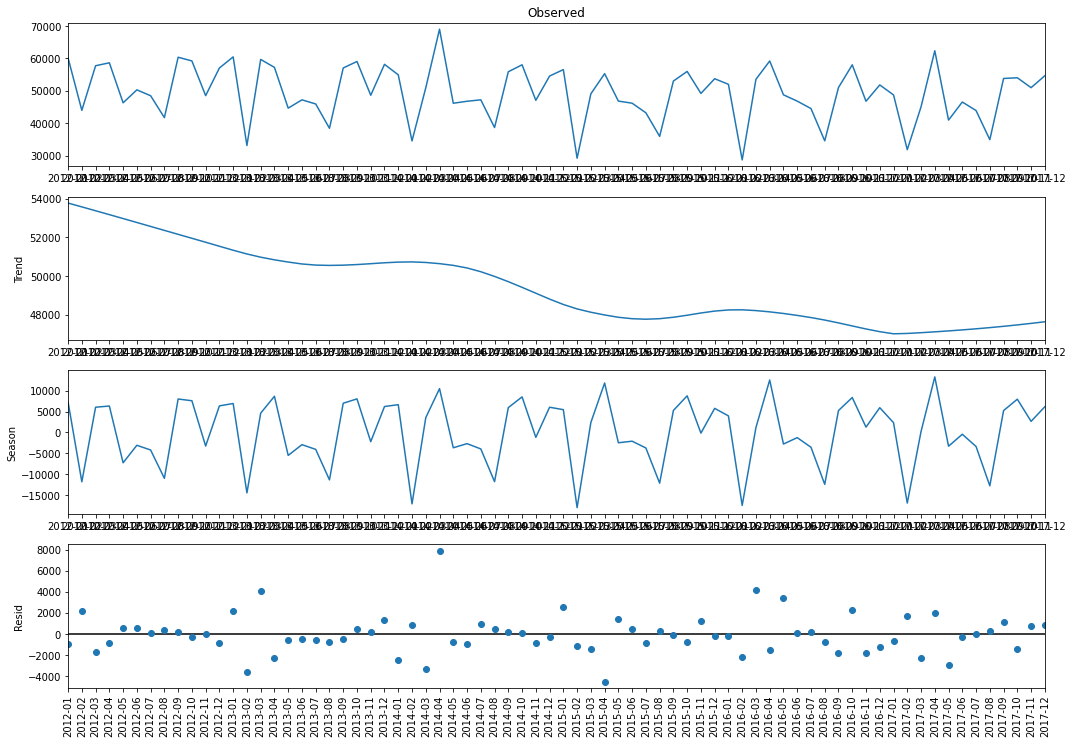

In [80]:
#STL decomposition
#reference - https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.STL.html?highlight=stl#statsmodels.tsa.seasonal.STL
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt

stl=STL(df_arrival_train, #run STL decomposition on training data
        period=12).fit() #set 12 months period for STL
#plt.rc('font', size=13)
plt.rcParams["figure.figsize"] = (15,10) #set plot size
stl.plot() #plot data
plt.xticks(rotation=90) #rotate x axis label to 90 degree
print('STL decomposition')
plt.show()

From the Trend plot from STL decomposition on arrival data between Jan 2012 to Dec 2017 above, we can see gradually decreasing of numbers of people arrived in HongKong (HK) between Jan 2012 and Jan 2017, while there was a slight gradual increase of number of people arrived after Jan 2017. 

From the seasonality plot, we can a consistent pattern of numbers of people arrived in HK in each 12months period, with the lowest numbers of arrival in every Feb and Aug, and highest numbers of arrival in every Mar-Apr, Sep-Oct and Nov-Dec periods.

##### Run the function moving_avg() on the trend component from the STL decomposition to forecast the trend value from 2018-01 to 2018-06.

In [81]:
#we only compare 6months data between Jan 2018 to Jun 2018
#set number of months to compare with test data shape[0], same as number of rows in the data
num_months = df_arrival_test.shape[0]
#execute moving average function to forcast the number of arrivals 
#based on the the trend value from STL decomposition with period of 6months windows
#extract the last 6months forcasted value using [-num_months:]
#convert forcasted value to integer using .astype() to simplify RMSE calculation 
stl_trend_forcast = moving_average(stl.trend.values,num_months)[-num_months:].astype('int')
print('Forcast value of number of arrivals between Jan 2018 to Jun 2018:', stl_trend_forcast)

Forcast value of number of arrivals between Jan 2018 to Jun 2018: [47157 47207 47262 47321 47386 47456]


In [82]:
#define RMSE function
def RMSE(forcastValue,trueValue):
    num_value=len(trueValue) #numbers of value to compare
    assert len(forcastValue) == len(trueValue) #make sure both list of value have the same length
    sqrList=[]#create empty list
    #iterate from each list of forcast and true value then calculate the difference
    #then calculate each squared error and add to the list
    for i in range(num_value):
        sqrList.append((forcastValue[i]-trueValue[i])**2)
    #sum up each squared error then divide by numbers of value to get MSE (mean squared error)
    #use np.sqrt to calculate square root of MSE -> RMSE
    RMSE = np.sqrt(sum(sqrList)/num_value)
    return RMSE

##### Report the forecasting error with RMSE 

In [83]:
#execute the RMSE value to calculate the forcasting error between forcast value and true value
RMSE_value= RMSE(stl_trend_forcast,df_arrival_test.values)
#print RMSE with round up 2 decimal places
print('The forecasting error with RMSE:', round(RMSE_value[0],2))

The forecasting error with RMSE: 11405.59


##### Explanation

The reason we chosen this solution was the STL (season-Trend decomposition using LOESS) package from ‘statesmodels.tsa.seasonal’ is the simplest and efficient way to extract the trend and seasonality pattern of the time series data. The alternative solution could be using ‘seasonal_decompose’ package, however it assumes that the seasonal component repeats each year and might not estimate all the trend data. We believe our solution is optimal, since it successfully extracted the trend data, and forecasted No. of arrival between Jan 2018 to Jun 2018 using ‘moving_average’ function, then calculated the RMSE value compared with the true data. 

#### Question 2.2

The problem is how to forecast the future arrivals on given time series, in normal forecasting scenario, the types of forecasting are usually concluded as: one-step forecasting and multi-steps forecasting. In here, we will focus on multi-steps forecasting.

    • Could you run ARIMA model to forecast the the arrivals from 2018-01 to 2018-06 by performing the multi-steps forecasting. (your model will need to only train on the training data and forecast the future on multi-steps at once.) You will also need to report the RMSE on your forecasting.

    • Could you show the best p,d and q parameters with the evaluation metrics on RMSE? (you will need to do grid search on the three parameters, assume the range of the all three parameter is same from 1 to 3).

    • Could you write down any other good models to do the multi-steps forecasting here rather than the ARIMA?

To Build ARIMA (auto regressive integrated moving average' model, need find the following parameter setting

 1. d (number of differencing required to make the time series stationary)
 2. p (order of the AR term)
 3. q (order of the MA term)

Solution below adapted the code structure from SIT 742 week 5 workshop material

Reference - https://github.com/tulip-lab/sit742/blob/develop/Jupyter/M05-DataAnalytics/M05B-ARIMA.ipynb

##### Find the differencing paramter d

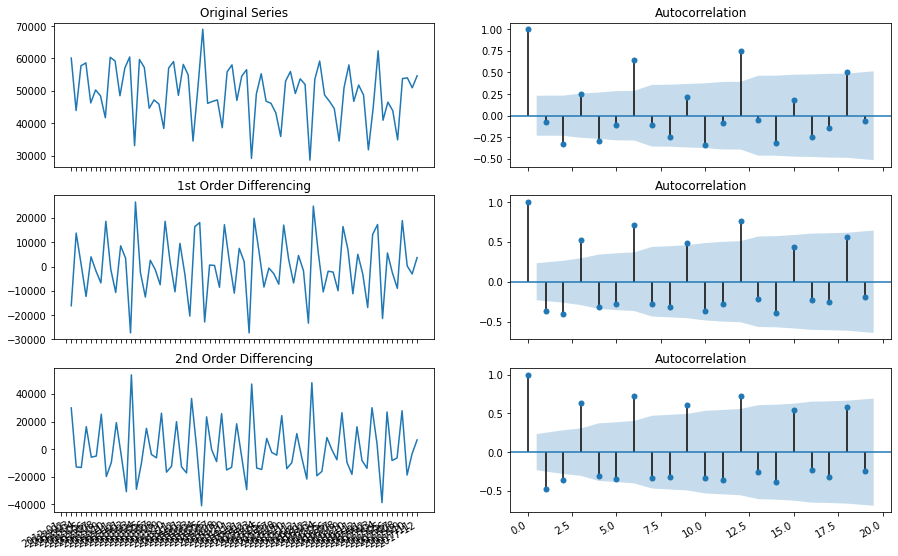

In [84]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#plot subplot
fig, axes = plt.subplots(3, 2)
# auto format labels
fig.autofmt_xdate()
#update plot size
plt.rcParams.update({'figure.figsize':(20,12), 'figure.dpi':60})

#plot original data
axes[0, 0].plot(df_arrival_train.arrival); axes[0, 0].set_title('Original Series')
plot_acf(df_arrival_train.arrival, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df_arrival_train.arrival.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df_arrival_train.arrival.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df_arrival_train.arrival.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df_arrival_train.arrival.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

For the above plots, the training data reaches stationarity with 0 order (original) of differencing. But on looking at the autocorrelation plot for the 1st and 2nd differencing the lag goes into the far negative zone fairly quick, which indicates, the series might have been over differenced. Therefore using differencing paramter d = 0, to build ARIMA model

##### Find the order of the AR term (p)

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


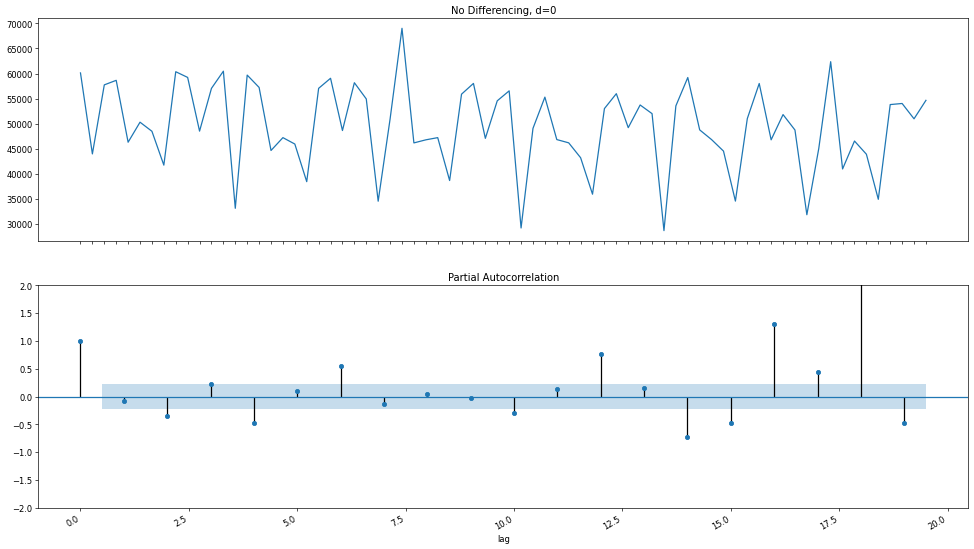

In [85]:
#plot subplot
fig, axes = plt.subplots(2, 1)
#auto format labels
fig.autofmt_xdate()
#plot original data
axes[0].plot(df_arrival_train.arrival); axes[0].set_title('No Differencing, d=0')
#set y label limit for PACF
axes[1].set(ylim=(-2,2))
# PACF (partial autocorrelation function) plot of original series
plot_pacf(df_arrival_train.arrival, ax=axes[1], method='yw')
#set x-axis label name
plt.xlabel('lag')

plt.show()

From the PACF plot above, we can see PACF lag 1 is well within the significance line , and lag 2 started to fall below the significance line, although lag 3 is above the significance line, we choosing p = 1 as the order of the AR term for ARIMA model, since using lag 1 could simplify our model. 

##### Find the order of the MA term (q)

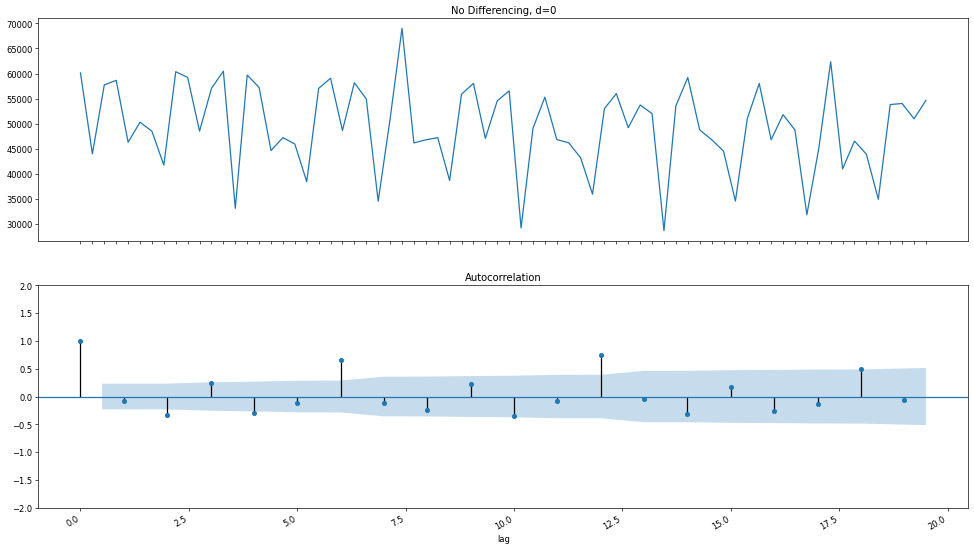

In [86]:
#plot subplot
fig, axes = plt.subplots(2, 1)
#format x labels
fig.autofmt_xdate()
#plot orginal data
axes[0].plot(df_arrival_train.arrival); axes[0].set_title('No Differencing, d=0')
#set y label limit for ACF
axes[1].set(ylim=(-2,2))
# ACF (autocorrelation function) plot of original series
plot_acf(df_arrival_train.arrival, ax=axes[1])
#set x-axis label name
plt.xlabel('lag')

plt.show()

From the ACF plot above, we can see ACF lag 1 is well within the significance line , and lag 2 started to fall below the significance line, although lag 3 is above the significance line, we choosing q = 1 as the order of the MA term for ARIMA model, since using lag 1 could simplify our model. 

#### Build the ARIMA Model

In [87]:
#import ARIMA package
from statsmodels.tsa.arima.model import ARIMA
#build model with selected b,d,q parameters on training data
p=1
d=0
q=1
model = ARIMA(df_arrival_train.arrival, order=(p,d,q))

#fit model
model_fit = model.fit()
#print out model summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                arrival   No. Observations:                   72
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -750.605
Date:                Tue, 20 Sep 2022   AIC                           1509.211
Time:                        04:52:48   BIC                           1518.317
Sample:                    01-01-2012   HQIC                          1512.836
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        4.95e+04   1242.290     39.846      0.000    4.71e+04    5.19e+04
ar.L1         -0.5517      0.365     -1.510      0.131      -1.268       0.164
ma.L1          0.7666      0.296      2.592      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Looking at the coef for ar.L1 and ma.L1, the p value of ar.L1 is not good with value higher than 0.05, but the p vlaue of ma.L1 is quite good which only 0.01, so we will plot out the residuals of the model to further examine the model.

##### plot the residuals to ensure there are no patterns

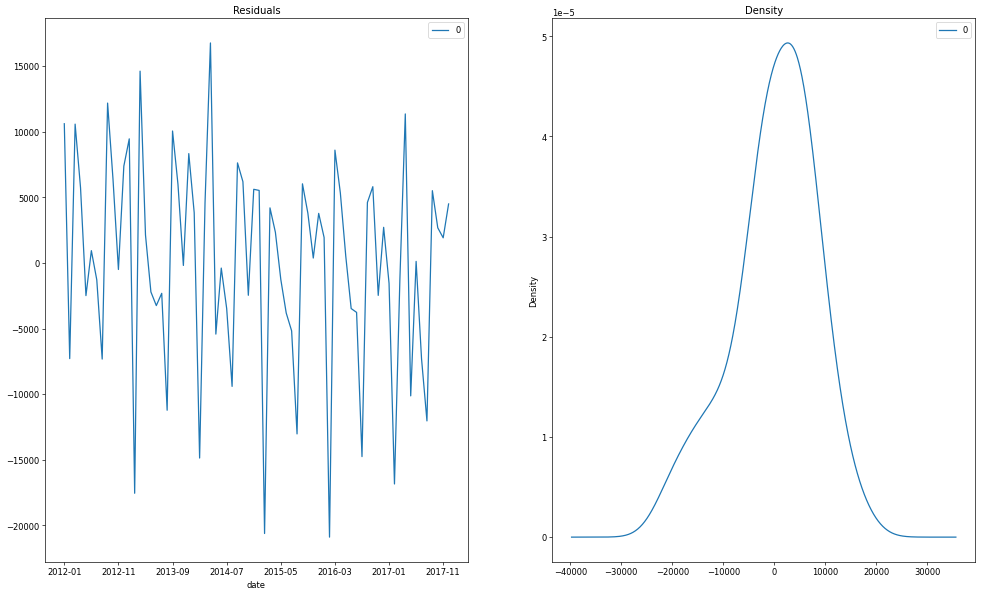

In [88]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
#subplot
fig, ax = plt.subplots(1,2)
#plot residuals graph
residuals.plot(title="Residuals", ax=ax[0])
#plot density graph
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

The residual errors seem fine with near zero mean and almost uniform variance. Therefore proceed to multi-steps forcasting with built ARIMA model. 

##### Forecast the the arrivals from 2018-01 to 2018-06 by performing the multi-steps forecasting

predicted=50104.705803, expected=58811.000000
predicted=49173.115349, expected=25649.000000
predicted=49688.822681, expected=48259.000000
predicted=49403.372961, expected=58997.000000
predicted=49561.385185, expected=43110.000000
predicted=49473.912052, expected=42521.000000

Forcasting error RMSE of Recursive Multi-step Forecast: 11642.086


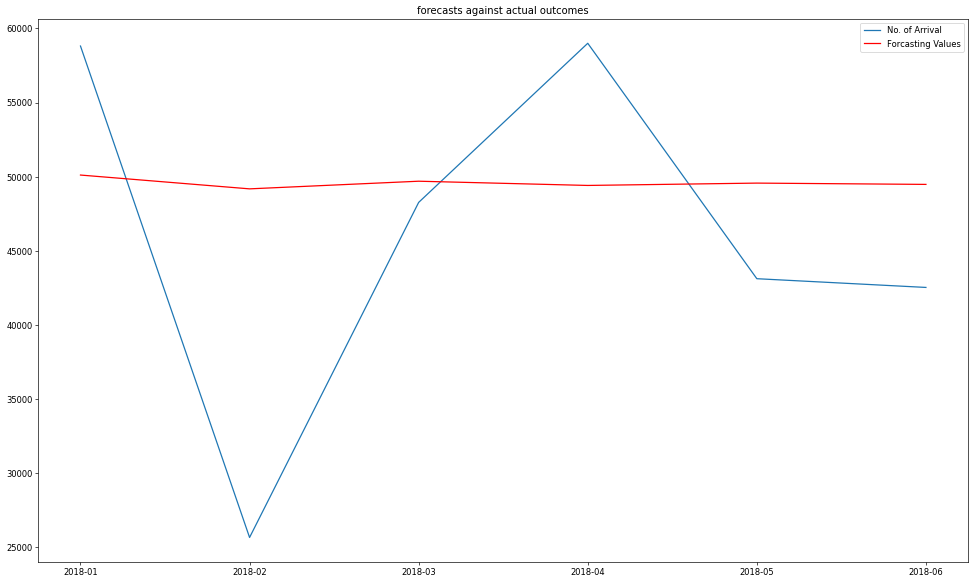

In [89]:
#Recursive Multi-step Forecast

#extract arrival value from train data and convert into a list
history=[x for x in df_arrival_train.arrival.values] 
#make a empty list to hold prediction
predictions = []
#iterate the len of test value which is 6 in this data
for t in range(len(df_arrival_test)):
    #build ARIMA model with selected parameters and extract training data
    model = ARIMA(history, order=(p,d,q))
    #fit model
    model_fit = model.fit()
    #forcast future arrival value 
    output = model_fit.forecast()
    #extract value from prediction
    yhat = output[0]
    #add prediction of each iteration to the prediction list 
    predictions.append(yhat)
    #extract true value of test data
    obs = df_arrival_test.arrival[t]
    #add the prediction value back to the history for next time step prediction
    history.append(yhat)
    #print out prediciton and expected value 
    print('predicted=%f, expected=%f' % (yhat, obs))

print()
# evaluate forecasts with RMSE function 
rmse = RMSE(predictions,df_arrival_test.values)
print('Forcasting error RMSE of Recursive Multi-step Forecast: %.3f' % rmse)

# plot forecasts against actual outcomes
plt.title('forecasts against actual outcomes')
plt.plot(df_arrival_test.arrival)
plt.plot(predictions, color='red')
plt.legend(['No. of Arrival','Forcasting Values'])
plt.show()

##### walk-forward validation

predicted=50104.705803, expected=58811.000000
predicted=51179.518565, expected=25649.000000
predicted=43751.351596, expected=48259.000000
predicted=52992.466486, expected=58997.000000
predicted=48070.914268, expected=43110.000000
predicted=49264.888991, expected=42521.000000

Forcasting error RMSE of walkForward_validation: 11930.849


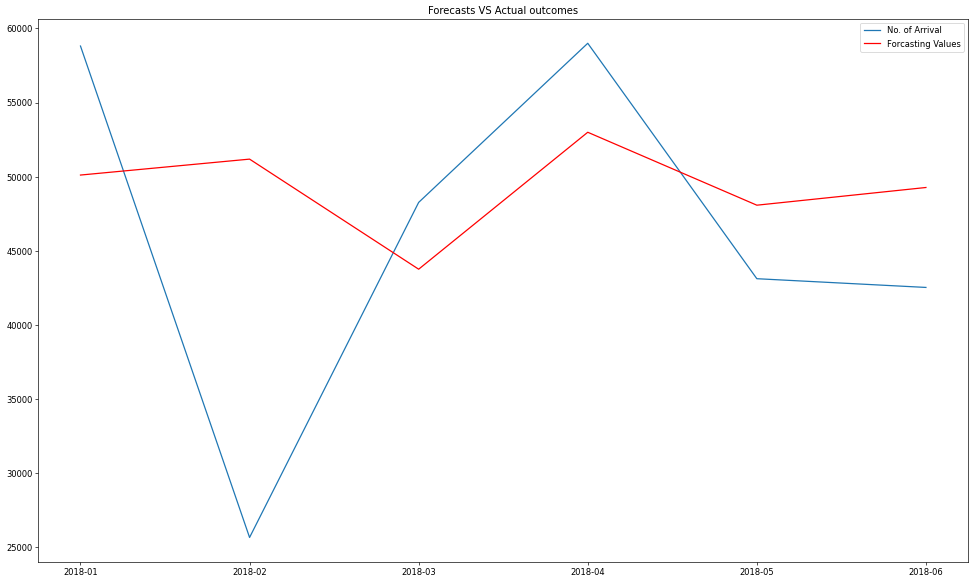

In [90]:
#define function to apply walk-forward validation 
def walkForward_validation(p,d,q):
    #extract arrival value from train data and convert into a list
    history=[x for x in df_arrival_train.arrival.values] 
    #make a empty list to hold prediction
    predictions = []
    #iterate the len of test value which is 6 in this data
    for t in range(len(df_arrival_test)):
        #build ARIMA model with selected parameters and extract training data
        model = ARIMA(history, order=(p,d,q))
        #fit model
        model_fit = model.fit()
        #forcast future arrival value 
        output = model_fit.forecast()
        #extract value from prediction
        yhat = output[0]
        #add prediction of each iteration to the prediction list 
        predictions.append(yhat)
        #extract true value of test data
        obs = df_arrival_test.arrival[t]
        #add the true arrival value to the history for next time step prediction
        history.append(obs)
        #print out prediciton and expected value 
        print('predicted=%f, expected=%f' % (yhat, obs))

    print()
    # evaluate forecasts with RMSE function 
    rmse = RMSE(predictions,df_arrival_test.values)
    print('Forcasting error RMSE of walkForward_validation: %.3f' % rmse)

    # plot forecasts against actual outcomes
    plt.title('Forecasts VS Actual outcomes')
    plt.plot(df_arrival_test.arrival)
    plt.plot(predictions, color='red')
    plt.legend(['No. of Arrival','Forcasting Values'])
    plt.show()

#execute function on pre-defined p,d,q
walkForward_validation(p,d,q)

From our ARIMA forecasting error result above, we can both RMSE values with and without walkForward_validation are very similar to each other, however the error rate still considerably large, therefore the p,d and q parameter of our model might not be optimal for multi-steps forecasting on provided dataset. Next step we will conduct grid search to find the best p,d and q value to optimize our model.

#### Conduct Grid Search on best p,d and q parameters 

In [91]:
#ignore convergence warning
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

In [92]:
#prepare range of parameter p,d,q for grid search
p=d=q=[1,2,3]
#create empty RMSE list to hold all RMSE value
RMSE_list=[]
#extract train data value
history=[x for x in df_arrival_train.arrival.values]
#create empty list to hold prediction
predictions = []
# walk-forward validation
#iterate each number of p,d,q range 
for i in p:
      for j in d:
            for k in q:
                #use try,except to catch any error
                try:
                    #similar to the walkForward_validation function with adjustment 
                      for t in range(len(df_arrival_test)):
                            #avoid LinAlgError: LU decomposition error
                            #that caused by order (2,3,3)
                            if i==2 and j==3 and k==3:
                                pass
                            else:
                                model = ARIMA(history, order=(i,j,k))
                                model_fit = model.fit()
                                output = model_fit.forecast()
                                yhat = output[0]
                                predictions.append(yhat)
                                obs = df_arrival_test.arrival[t]
                                history.append(obs)

                      rmse = RMSE(predictions,df_arrival_test.values)
                      history=[x for x in df_arrival_train.arrival.values]
                      predictions = []
                      RMSE_list.append(rmse)
                      print('Test RMSE: %.3f' % rmse,i,j,k)
                    #if the RMSE if the mimimum of the RMSE list
                      if rmse==min(RMSE_list):
                            pdq_optimal=[i,j,k] #assign best parameter as the p,d,q values
                            RMSE_optimal=rmse #extract the best RMSE value

                except:
                    pass

Test RMSE: 11750.916 1 1 1


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Test RMSE: 11718.115 1 1 2
Test RMSE: 10707.548 1 1 3
Test RMSE: 17378.111 1 2 1
Test RMSE: 16165.297 1 2 2
Test RMSE: 13643.551 1 2 3
Test RMSE: 26592.409 1 3 1
Test RMSE: 31249.963 1 3 2
Test RMSE: 19269.330 1 3 3
Test RMSE: 13605.905 2 1 1
Test RMSE: 10537.818 2 1 2
Test RMSE: 9160.753 2 1 3
Test RMSE: 13378.131 2 2 1
Test RMSE: 14322.867 2 2 2
Test RMSE: 12245.784 2 2 3
Test RMSE: 18701.105 2 3 1
Test RMSE: 14762.548 2 3 2
Test RMSE: 10498.764 3 1 1


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Test RMSE: 10743.987 3 1 2
Test RMSE: 9823.446 3 1 3
Test RMSE: 14115.721 3 2 1
Test RMSE: 14446.741 3 2 2
Test RMSE: 12234.328 3 2 3
Test RMSE: 17775.978 3 3 1
Test RMSE: 16871.032 3 3 2
Test RMSE: 14432.801 3 3 3


In [93]:
print('Best p,d and q parametes are',pdq_optimal,'with lowest RMSE of',RMSE_optimal,'from the grid search')

Best p,d and q parametes are [2, 1, 3] with lowest RMSE of [9160.75268885] from the grid search


predicted=50624.497535, expected=58811.000000
predicted=42470.530504, expected=25649.000000
predicted=52423.685404, expected=48259.000000
predicted=52201.622674, expected=58997.000000
predicted=41617.204429, expected=43110.000000
predicted=51890.281281, expected=42521.000000

Forcasting error RMSE of walkForward_validation: 9160.753


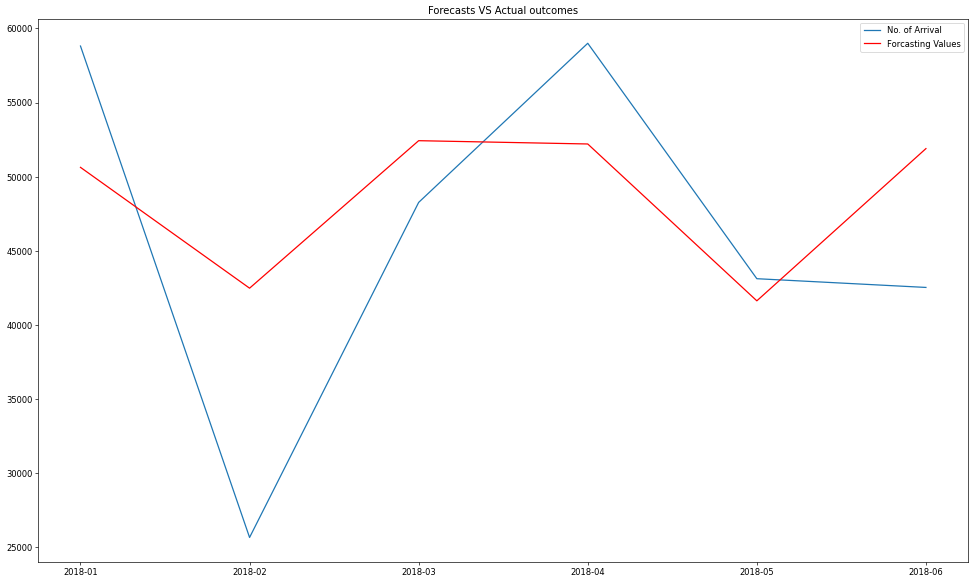

In [94]:
#execute walk-forward validation function with best p,d,q
p,d,q=pdq_optimal 
walkForward_validation(p,d,q)

ARIMA model combine with grid search successfully reduced the RMSE value comparing the ARIMA model result without grid search. Although the RMSE value still considerably large, the model still have rooms for improvement if we extend the grid search range for parameter p,d and q.  

#### Other good models to do the multi-steps forecasting here rather than the ARIMA

Models below are based on

Tomonori Masui,
'Multi-step Time Series Forecasting with ARIMA, LightGBM, and Prophet', 7 Jul 2021, towardsdatascience.com

https://towardsdatascience.com/multi-step-time-series-forecasting-with-arima-lightgbm-and-prophet-cc9e3f95dfb0

#### Model 1 : LightGBM

LightGBM is a gradient boosting framework that uses tree based learning algorithms that capable to capture complex pattern of time-series data

In [95]:
#install python packages
!pip install lightgbm
!pip install sktime
#!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.9 MB 12.8 MB/s 


In [96]:
#import python libraries
import lightgbm as lgb
#import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
#import seaborn as sns
#from prophet import Prophet
from sktime.forecasting.arima import AutoARIMA
from sktime.forecasting.compose import (TransformedTargetForecaster,
                                        make_reduction)
from sktime.forecasting.model_selection import (ExpandingWindowSplitter,
                                                ForecastingGridSearchCV)
from sktime.forecasting.trend import PolynomialTrendForecaster
from sktime.transformations.series.detrend import Deseasonalizer, Detrender
#from sktime.utils.plotting import plot_series

/usr/local/lib/python3.7/dist-packages/sktime/utils/validation/_dependencies.py:117: UserWarning: No module named 'pmdarima'. 'pmdarima' is a soft dependency and not included in the base sktime installation. Please run: `pip install pmdarima` to install the pmdarima package. To install all soft dependencies, run: `pip install sktime[all_extras]`
  warnings.warn(msg)


In [97]:
#extract training and test data arrival data 
train=df_arrival_train.arrival.values
test=df_arrival_test.arrival.values

In [98]:
#create plot forecasting function
def plot_forecast(series_train, series_test, forecast):
    #calcuate RMSE
    rmse = RMSE(series_test, forecast)
    print('Forcasting error RMSE of LightGBM Multi-step Forecast: %.3f' % rmse)
    #plot forecasting graph
    plt.title('Forecasts VS Actual outcomes')
    plt.plot(df_arrival_test.arrival) #plot true data
    plt.plot(forecast, color='red') #plot prediciton data
    plt.legend(['No. of Arrival','Forcasting Values']) #label plot 
    plt.show()
    return rmse

#create grid search function to find best parameter for the model
#then forecast the future values using the best parameter and
#plot the forecasting value plot
def grid_serch_forecaster(train, test, forecaster, param_grid):
    # Grid search on window_length = length of 70% of the training data
    cv = ExpandingWindowSplitter(initial_window=int(len(train) * 0.7))
    # 
    gscv = ForecastingGridSearchCV(
        forecaster, #forcasting model 
        strategy="refit", #forecaster is refitted to each training
        cv=cv, #Grid search on window_length 
        param_grid=param_grid #grid search on model's parameters 
    )
    gscv.fit(train) #fit training data
    print(f"best params: {gscv.best_params_}") #print out best parameter from grid search

    # forecasting value one-step ahead 
    fh = np.arange(len(test)) + 1 
    y_pred = gscv.predict(fh=fh) 
    print()
    print('forecasting arrival numbers between Jan2018 - Jun2018',y_pred)
    print()

    #plot forecasting and show RMSE value
    rmse = plot_forecast(train, test, y_pred)
    return rmse

In [99]:
#create function to build lightGBM forcaster
def create_forecaster(sp=12, degree=1):

    # creating forecaster with LightGBM
    regressor = lgb.LGBMRegressor()
    # since there is a strong trend and seasonal effect presented by the data
    # and lightGBM is a regression tree algorithm that cannot predict values 
    # beyond what it has seen in training data, therefore 
    # it is essential to detrend and deseasonlize the time series using 
    # 'TransformedTargetForecaster' pipeline before forcasting with lightGBM model 
    forecaster = TransformedTargetForecaster(
        [   
            #deseasonalize the time series
            ("deseasonalize", Deseasonalizer(model="multiplicative", #multi-years 
                                             sp=sp)), #12 months (1yr) seasonality 
            #detrend the time series with a 1st degree polynomial transformation of the feature
            ("detrend", Detrender(forecaster=PolynomialTrendForecaster(degree=degree))),
            #create recursive multi-step forcasting wrapping with both detrender
            # and deseasonlizer with the LGBMRegressor 
            (
                "forecast",
                make_reduction(regressor, #lightGBM regressor 
                               window_length=12, #set window_length to 12 months period
                               strategy="recursive"), #recursive multi-step forcasting
            ),
        ]
    )
    #return the forecaster
    return forecaster

best params: {'forecast__window_length': 30}

forecasting arrival numbers between Jan2018 - Jun2018 [[50540.75799264]
 [29744.82374325]
 [48952.96766852]
 [56244.79812084]
 [42097.95268742]
 [43087.01329353]]

Forcasting error RMSE of LightGBM Multi-step Forecast: 3970.170


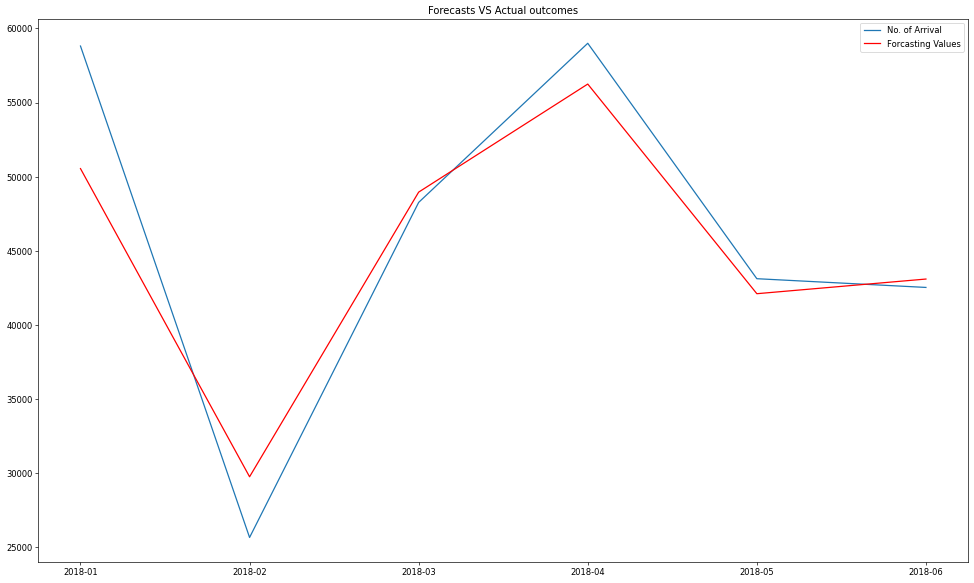

In [100]:
#create lightGBM forcaster 
forecaster = create_forecaster()
#set parameter of window_length of 6,12,18,24,30 and 36 months period for grid search 
param_grid = {"forecast__window_length": [6, 12, 18, 24, 30, 36]} 
#execute grid search 
lgb_rmse = grid_serch_forecaster(
    train, test, forecaster, param_grid
)

#### Model 2 : Prophet

Prophet is a time series forecasting model developed by Facebook in 2017 which can effectively deal with multiple seasonalities (yearly, weekly, and daily)

In [101]:
#import Prophet package
from prophet import Prophet
#reset training data index
train_pp=df_arrival_train.reset_index()
# Prophet requires specific column names: ds and y
train_pp.columns = ["ds", "y"]

# tuning on only yearly seasonality as this is monthly data.
# As the seasonality effects varies across years, we need multiplicative seasonality mode
m = Prophet(
    seasonality_mode="multiplicative",
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
)

#train model 
m.fit(train_pp)
#build multi-steps forecasting 
future = m.make_future_dataframe(periods=num_months, #period of 6months 
                                 freq="M") #monthly forcasting 
forecast = m.predict(future) #execute forcasting 
#select the last 6months from the forecast for comparison 
forecast = forecast.iloc[-num_months:] 
print()
print('Forecasting arrival numbers between Jan2018 - Jun2018')
forecast['yhat']

DEBUG:cmdstanpy:input tempfile: /tmp/tmpq_1synb_/s7ehzznd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq_1synb_/_nlzz1jk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79280', 'data', 'file=/tmp/tmpq_1synb_/s7ehzznd.json', 'init=/tmp/tmpq_1synb_/_nlzz1jk.json', 'output', 'file=/tmp/tmp4a1zw48a/prophet_model-20220920045333.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:53:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:53:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Forecasting arrival numbers between Jan2018 - Jun2018


72    52282.429057
73    34008.217196
74    41143.871103
75    60357.918640
76    44737.116566
77    43638.879663
Name: yhat, dtype: float64

Forcasting error RMSE of Prophet Multi-step Forecast: 5305.234


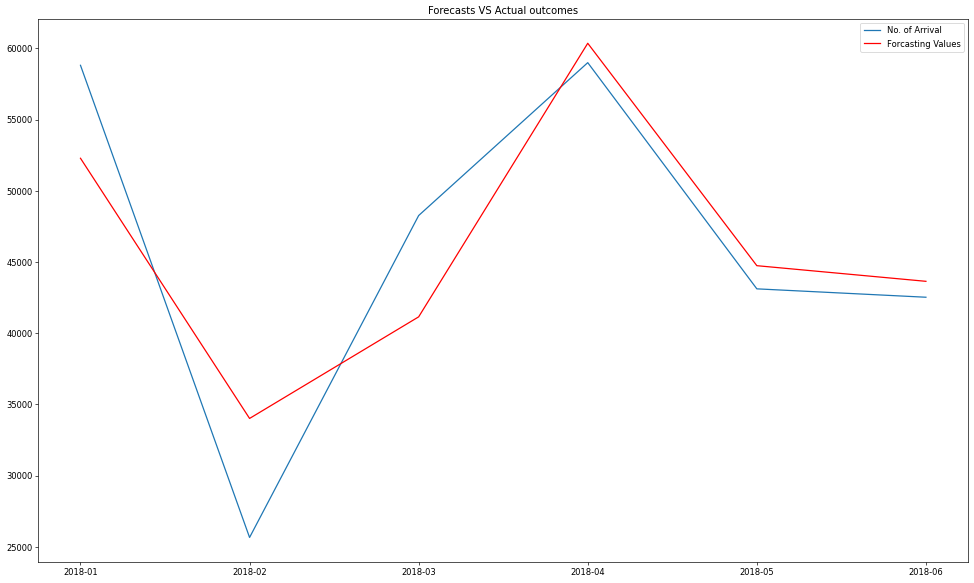

In [102]:
#create plot forecast graph
def plot_forecast(series_train, series_test, forecast):
    #calculate RMSE 
    rmse = RMSE(series_test, forecast)
    print('Forcasting error RMSE of Prophet Multi-step Forecast: %.3f' % rmse)
    #plot forecasting graph
    plt.title('Forecasts VS Actual outcomes')
    plt.plot(df_arrival_test.arrival)
    plt.plot(forecast, color='red')
    plt.legend(['No. of Arrival','Forcasting Values'])
    plt.show()
    return rmse
#execute multi-step forecasting using Prophet model
prophet_rmse = plot_forecast(
    train, test, forecast["yhat"].values)

In [103]:
#display pandas dataframe float value with 2 decimal places
pd.options.display.float_format = "{:.2f}".format
#create result table with RMSE from all models
df_result=pd.DataFrame(
    {
        "RMSE": [RMSE_optimal[0], lgb_rmse[0], prophet_rmse],
    },
    index=["ARIMA", "LightGBM","Prophet"],
)

print('Model results comparison table')
df_result

Model results comparison table


,RMSE
ARIMA,9160.75
LightGBM,3970.17
Prophet,5305.23


Based on result table above, the LightGBM is the best model for this task since it produced the least RMSE result, follow by Prophet model. While ARIMA model produced the highest RMSE value which is the least satisfied result. 

##### Explanation

The reason we chosen this solution was it is more constructive and throughout to show the logic on solving each part of the question. For example, we could use ‘AutoARIMA’ package to find out the p,d and q parameters to first create our ARIMA model, however we could not demonstrate how these parameters were estimated. In regarding to implement different models instead of ARIMA, we would like to believe our solution is optimal, however there could be more efficient and effective deep learning models that could produce a better result, but we could not implement them due to time constraints. 